# Chapter 1: Applications of Linear Algebra

## Introduction

In this introductory chapter we will look at some applications of linear algebra to data science problems.

In fact we will only need real matrices. As a reminder, a real matrix $A$ is a table with $n$ rows and $m$ columns, entries of which are real numbers $a_{ij},$ $1 \le i \le n,$ $1 \le j \le m.$ The following notation is used $A=(a_{ij}).$ Here are some examples of matrices:

$$
\begin{pmatrix}
1 & 2\\
3 & 4
\end{pmatrix}, \
\begin{pmatrix}
5 & 6 & 7 \\
8 & 9 & 10
\end{pmatrix}, \
\begin{pmatrix}
\sqrt{2} \\
\pi \\
e
\end{pmatrix}.
$$

## Review: Matrix operations

If you do not remember / are not familiar with standard algebraic operations on matrices please read through [this wikipedia article](https://en.wikipedia.org/wiki/Matrix_(mathematics)#Basic_operations).

We will denote the transpose of the matrix $A$ by $A^T$, i.e. $A^T$ is $A$ with rows and columns switched. Example:
$$
  A = \begin{pmatrix}
1 & 2\\
3 & 4
\end{pmatrix}, \ A^T = \begin{pmatrix}
1 & 3\\
2 & 4
\end{pmatrix}
$$

## Review: Matrix Determinant

If you do not remember / are not familiar with the matrix determinant please read through [this wikipedia article](https://en.wikipedia.org/wiki/Determinant).

We will denote the determinant of $A$ by $\det(A).$ Example:
$$
  \det \begin{pmatrix}
a & b\\
c & d
\end{pmatrix} = \begin{vmatrix}
a & b\\
c & d
\end{vmatrix} = ad-bc.
$$

## Review: Eigenvalues

A matrix is called square if it has the same number of rows and columns.

A complex number $\lambda$ is called an **eigenvalue** of an $n$ by $n$ square matrix $A$ if there exists an $n$ dimensional non-zero column vector $u \in \mathbb{R}$ such that
$$
  Au = \lambda u.
$$

The vector $u$ is then called an **eigenvector**. Eigenvectors corresponding to the same eigenvalue form a linear subspace of $\mathbb{R}^n.$

## Review: Finding Eigenvalues I

Eigenvalues of $A$ are in one to one correspondence with the roots of the polynomial
$$
  P(\lambda) = \det(A-\lambda I),
$$
where $I$ is the identity matrix.

## Review: Finding Eigenvalues II

For example, in order to find the eigenvalues of
$$
\begin{pmatrix}
1 & 2\\
3 & 4
\end{pmatrix}
$$
we can solve the following equation
$$
\det \begin{pmatrix}
1-\lambda & 2\\
3 & 4-\lambda
\end{pmatrix} = \lambda^2-5\lambda-2=0.
$$
Solutions are 
$\frac{5+\sqrt{33}}{2}\approx5.37,$ $\frac{5-\sqrt{33}}{2}\approx-0.37$.

## Review: Finding Eigenvalues III

We can also find eigenvalues of a matrix using python's `numpy` package:

In [1]:
import numpy as np

A = np.array([[1, 2], [3, 4]])
eigenvalues = np.linalg.eigvals(A)
print(f"Matrix A:")
print(A)
print(f"Eigenvalues of A: {eigenvalues}")

Matrix A:
[[1 2]
 [3 4]]
Eigenvalues of A: [-0.37228132  5.37228132]


## Singular Value Decomposition I

Every real $n$ by $m$ matrix $A$ has a (non-unique) **Singular Value Decomposition** (SVD):
$$
  A = U M V^T,
$$
where $U$ is a $n$ by $n$ matrix, $M$ is a $n$ by $m$ matrix and $V$ is a $m$ by $m$ matrix. Matrices $U$ and $V$ are orthogonal, i.e. $UU^T=I$ and $VV^T=I$ and $M$ is a diagonal matrix with non-negative entires.

Algorithms for computing SVD can be found on [wikipedia](https://en.wikipedia.org/wiki/Singular_value_decomposition#Calculating_the_SVD).

## Singular Value Decomposition II

- Example:
$$
  A = \begin{pmatrix}
1 & 0 & 0 & 0 & 2\\
0 & 0 & 3 & 0 & 0\\
0 & 0 & 0 & 0 & 0\\
0 & 2 & 0 & 0 & 0
\end{pmatrix},
$$


## Singular Value Decomposition III
then
$$
U = \begin{pmatrix}
0 & -1 & 0 & 0\\
-1 & 0 & 0 & 0\\
0 & 0 & 0 & -1\\
0 & 0 & -1 & 0
\end{pmatrix}, \
M = \begin{pmatrix}
3 & 0 & 0 & 0 & 0\\
0 & \sqrt{5} & 0 & 0 & 0\\
0 & 0 & 2 & 0 & 0\\
0 & 0 & 0 & 0 & 0
\end{pmatrix}
$$

## Singular Value Decomposition IV
and
$$
V^T = \begin{pmatrix}
0 & 0 & -1 & 0 & 0\\
-\sqrt{0.2} & 0 & 0 & 0 & -\sqrt{0.8}\\
0 & -1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0\\
-\sqrt{0.8} & 0 & 0 & 0 & \sqrt{0.2}
\end{pmatrix}.
$$

## Singular Value Decomposition V

The non-zero entries of $M$ are the square roots of the eigenvalues of the square matrix $AA^T,$ they are called the **singular values** of $A,$ hence the name of the decomposition.

Note that the eigenvalues of $AA^T$ must be real and non-negative, because $AA^T$ is self-adjoint (with respect to the usual Euclidean norm) and positive semi-definite. Hence, singular values are well defined.

## Singular Value Decomposition VI

Usually SVD is chosen so that the non-zero values of $M$ would be arranged from largest to smallest.

One application of SVD is data compression. Let's say the data is represented by a matrix $A$. The procedure is as follows:

1. Compute the SVD of $A.$
2. Cut off $i$ smallest singular values from $M$
3. Multiply back to get the matrix $A'$. $A'$ is then the compressed version of $A$

## Singular Value Decomposition VII

This procedure is well illustrated by the following picture:

![](../images/svd-and-rank-k-approximations-l.jpg){fig-align="center"}

Let's see some applications of this idea.

## SVD: Compressing images I

A digital image is just a matrix of pixels. If the image is in black and white then each pixel can be represented by a single number and thus the whole image can be represented by a matrix.

If an image is in color, then each pixel is represented by three numbers, its RGB (red, green, blue) values.

For simplicity, we will stick with black and white images.

## SVD: Compressing images II

Image resolution: (312, 198)


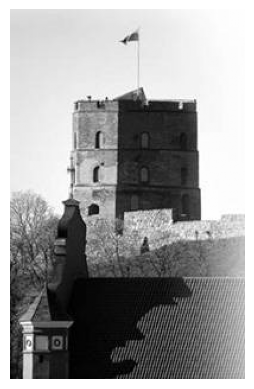

In [2]:
#| output-location: slide
from PIL import Image # Library for handling images
import matplotlib.pyplot as plt
import numpy as np

def show(X):
  """Function for displaying image from numpy array"""
  m = 255 if X.max() > 1 else 1
  plt.imshow(X, cmap='gray', vmin=0, vmax=m)
  plt.axis('off')

image = np.array(Image.open('../images/castle.jpg').convert('L')) # Load the image and save it to a numpy array
print(f"Image resolution: {image.shape}")
show(image)

## SVD: Compressing images III

In [3]:
U, M, V = np.linalg.svd(image) # Compute SVD
# Note that in the output V is already transposed, i.e. you do not need to transpose it manually
# Also M is given by an array instead of a matrix, indeed
print(f"Shape of U: {U.shape}")
print(f"Shape of M: {M.shape}")
print(f"Shape of V: {V.shape}")

Shape of U: (312, 312)
Shape of M: (198,)
Shape of V: (198, 198)


## SVD: Compressing images IV

Let's try applying the idea we discussed to compress the image.

Compressed image resolution: (312, 198)
Compression rate: 0.9065786202155822


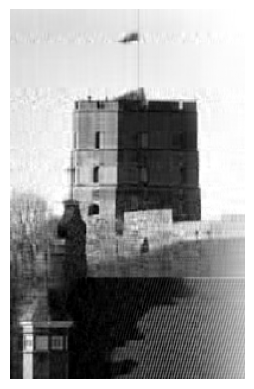

In [4]:
#| output-location: slide
def size(u, m, v):
  """Function to compute SVD matrix sizes"""
  return u.shape[0]*u.shape[1] + len(m) + v.shape[0]*v.shape[1]

s = 25 # Singular values to keep
assert(s <= len(M))

U_comp = U[:, :s] # Truncate the matrices
M_comp = M[0:s]
V_comp = V[:s, :]
image_comp = (U_comp * M_comp) @ V_comp # Multiply back; @ is matrix multiplication in numpy
print(f"Compressed image resolution: {image_comp.shape}")
print(f"Compression rate: {1 - size(U_comp, M_comp, V_comp)/size(U, M, V)}")
show(image_comp)

## SVD: Recommender System I

We are going to build a movie recommender system using the following dataset.

In [5]:
#| output-location: slide
import numpy as np
import pandas as pd

reviews = pd.read_csv('../data/movielens/crosstable.csv', index_col="userId")
names = reviews.T.index.to_numpy()
reviews

,(500) Days of Summer (2009),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),2001: A Space Odyssey (1968),21 Jump Street (2012),28 Days Later (2002),300 (2007),3:10 to Yuma (2007),...,X-Men: First Class (2011),X-Men: The Last Stand (2006),X2: X-Men United (2003),Yes Man (2008),You've Got Mail (1998),Young Frankenstein (1974),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.5,3.5,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.5,5.0,0.0,...,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0


## SVD: Recommender System II

That is we have users in rows, movies in columns and values represent a rating that a user gave to a movie (rating is 0 if user has not rated the movie).

Now suppose we compute the SVD of this matrix $U M V^T$. The matrix $V^T$ stores information on original matrix's columns, in this case movies. The rows of $V^T$ are eigenvectors of $M^TM$ and they form a basis.

## SVD: Recommender System III

The columns of $V^T$ give an embedding of the movies to the linear space spanned by the rows of $V^T$. I.e. the column that represents a movie gives the coordinates of the movie in this linear space. If we assume that similar people rate similar movies similarly we then get that similar movies should be close to each other in the space.

We can then use this idea to generate recommendations for movies. Let's see how we could implement this.

## SVD: Recommender System IV

In [6]:
#| output-location: slide
def find_recommendations(movie_name, data):
  movie_to_compare = data[np.argwhere(names == movie_name)[0]]
  distances = np.linalg.norm(data - movie_to_compare, axis=1) # Compute the Euclidean distance between the given movie and all others
  return names[distances.argsort()[:10]] # Take ten movies with lowest distance from given movie

U, M, V = np.linalg.svd(reviews, full_matrices=False)
V1 = V[:40].T # Remove noise
print(f"Movies similar to:")
print(f"Toy Story: {find_recommendations('Toy Story (1995)', V1)}")
print(f"Iron Man: {find_recommendations('Iron Man (2008)', V1)}")


Movies similar to:
Toy Story: ['Toy Story (1995)' 'Toy Story 2 (1999)' 'Toy Story 3 (2010)'
 "Bug's Life, A (1998)" 'Inside Out (2015)'
 'Hunchback of Notre Dame, The (1996)' 'James and the Giant Peach (1996)'
 'Escape from L.A. (1996)' 'Monsters, Inc. (2001)' 'Dragonheart (1996)']
Iron Man: ['Iron Man (2008)' 'Kung Fu Panda (2008)' 'Star Trek (2009)'
 'Avatar (2009)' 'Zombieland (2009)'
 "Pirates of the Caribbean: At World's End (2007)" 'Source Code (2011)'
 'Iron Man 2 (2010)' 'Avengers, The (2012)' 'Watchmen (2009)']


## SVD: Linear Regression I

Linear regression is a model that approximates a dependent random variable $Y$ by independent random variables $X_1, \ \dots, \ X_m$ using a linear function (more accurately an affine function). I.e.
$$
  Y = \beta_0 + \beta_1 X_1 + \dots + \beta_m X_m + \varepsilon,
$$
where $\varepsilon$ is a random variable representing noise.

## SVD: Linear Regression II

Let's say we have $n$ observations $(y_i, x_{i1}, \dots, x_{im})_{i=1}^n.$
Denote
$$
  Y = \begin{pmatrix}
y_1 \\
\dots \\
y_n
\end{pmatrix}, \ X = \begin{pmatrix}
1 & x_{11} & \dots & x_{1m}\\
\dots \\
1 & x_{n1} & \dots & x_{nm}
\end{pmatrix}, \ \beta = \begin{pmatrix}
\beta_0 \\
\dots \\
\beta_m
\end{pmatrix}.
$$

## SVD: Linear Regression III

One approach to fitting a linear regression model to this data is to find $\beta$ that minimizes
$$
  \left\lVert X\beta-Y \right\rVert^2.
$$

This is called least-squares estimate. It can easily be shown that such a $\beta$ is equal to 
$$(X^TX)^{-1}X^TY.$$

## SVD: Linear Regression IV

Usually, in implementations of linear regression, $\beta$ is computed using SVD.

Let $X=UMV^T$ be the SVD of $X.$ Then,
$$
  \beta = (X^TX)^{-1}X^TY = VM^{-1}U^TY.
$$

## SVD: Linear Regression V

Let's fit a linear regression model using SVD. We are going to use the diabetes dataset that ships with `sklearn`.

In [7]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import root_mean_squared_error
import numpy as np

X = load_diabetes().data
Y = load_diabetes().target
n, m = X.shape
X_with_ones = np.hstack([np.ones(n)[:, np.newaxis], X]) # Add ones to dataset 

U, M, V = np.linalg.svd(X_with_ones)
beta = (((V.T*np.reciprocal(M))) @ U[:, :len(M)].T) @ Y.T

Y_svd = X_with_ones @ beta.T

print(f"RMSE with our fit: {root_mean_squared_error(Y, Y_svd)}")

RMSE with our fit: 53.476128764026576


## SVD: Linear Regression VI

Let's compare our fit to the one provided by `sklearn's` linear regression model.

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, Y) # You do not need to append 1 to X when using sklearn's function
Y_sklearn = model.predict(X)

print(f"RMSE with sklearn: {root_mean_squared_error(Y, Y_sklearn)}")
print(f"RMSE between our fit and sklearn: {root_mean_squared_error(Y_svd, Y_sklearn)}")

RMSE with sklearn: 53.47612876402657
RMSE between our fit and sklearn: 8.860957917960832e-14


The results are the same (up to rounding errors) as they should be. `sklearn` also uses SVD under the hood to fit linear regression.

## SVD: Principal Component Analysis I

**Principal Component Analysis** (PCA) is a technique for reducing the dimensionality of data.

Suppose you have $n$ samples of $m$ variables. PCA allows you to compress those $m$ variables into let's say $k$ variables, where $k < m$. Hopefully, this compression also removes noise from your dataset.

We will not go into the mathematics behind PCA, the goal is only to showcase what you can accomplish utilizing data compression. Good place to start reading up on PCA is the [wikipedia article](https://en.wikipedia.org/wiki/Principal_component_analysis).

## SVD: Principal Component Analysis II

You can perform PCA as follows:

1. Centralize your variables, that is from each observation of your variable subtract the sample mean of that variable (so that the sample mean of the variable becomes 0).
2. Form a matrix $A$ where rows represent samples and columns represent variables.
3. Compute SVD of $A = UMV^T.$
4. Keep only first $k$ singular values and truncate $U$ appropriately.

## SVD: Principal Component Analysis III

5. Multiply the truncated $U$ and $M$ together, you will get a matrix with $n$ rows and $k$ columns. The rows still represent samples and columns represent the compressed variables.

Let's apply PCA to the diabetes dataset. `sklearn` has an implementation of PCA, which also performs step 1 automatically, i.e. you do not have to provide centralized data.

## SVD: Principal Component Analysis IV

In [9]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

X = load_diabetes().data
Y = load_diabetes().target

pca = PCA(n_components=5, random_state=34)
X_compressed = pca.fit_transform(X)

model = LinearRegression()
model.fit(X_compressed, Y) # You do not need to append 1 to X when using sklearn's function
Y_pred = model.predict(X_compressed)
print(f"RMSE: {root_mean_squared_error(Y, Y_pred)}")

RMSE: 54.430712061822824


We did not get any improvement to our fit in this case, but its a good technique to keep in mind none the less.

## PCA: Anomaly Detection I

Performing PCA actually gives us a (linear) function for encoding data, let's call it $E$. It also gives us a function for decoding data, let's call it $D.$ Of course, $D$ is not perfect, i.e. if we encode a vector $x$ and then decode it we are not going to get a vector equal to $x$.

Let's define reconstruction error to be the Euclidean distance between $x$ and $D(E(x)),$ that is I encode $x$, decode it and compare what I get to the original $x$ to get the reconstruction error.

## PCA: Anomaly Detection II

The reconstruction error is going to be the lowest when $x$ is very similar to the initial data we used to fit our PCA.
We can utilize this to detect anomalies as follows:

1. Take typical examples of your data and use it to fit PCA.
2. When new data comes in compute its reconstruction error. If it is unusually high it is a good indication that you just received an anomaly.

## PCA: Anomaly Detection III

Try to implement this idea yourselves. Here is some code to get you started.

Regular face and anomaly:


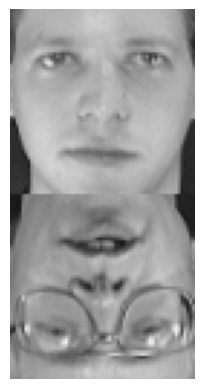

In [10]:
#| output-location: column

from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def show(X, height=64, width=64):
  """Function for displaying image from numpy array"""
  m = 255 if X.max() > 1 else 1
  plt.imshow(np.reshape(X, (height, width)), cmap='gray', vmin=0, vmax=m)
  plt.axis('off')
  plt.show()

faces = fetch_olivetti_faces()["data"]
regular, anomalies, train = faces[:10], np.flip(faces[10:20], axis=1), faces[20:]

print("Regular face and anomaly:")
show(np.array([*regular[0], *anomalies[0]]), height=128)

## PCA: Anomaly Detection IV

Take the faces in the train array and use them to fit PCA. Then compute the reconstruction error for the unmodified faces in the regular array and flipped faces in the anomalies array. Check if you can see the difference in reconstruction errors.

Might be useful:

- [`sklearn's` PCA documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).
- You can compute the Euclidean norm using the `np.linalg.norm` function.